In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from os import path
from IPython.core.display import display
mpl.rcParams['figure.facecolor'] = 'white'

In [4]:
from CellModels.Clustering.Data import HarmonizedClusteringResult
from CellModels.Clustering.Figures import GeneClusteringPlot, MultiClusteringPlot
from CellModels.Clustering.IO import MultiClusteringReader

In [5]:
sample_dir = path.expanduser(
    '~/Google Drive File Stream/My Drive/Projects/RDN-WDP/new-clustering/single-gene')
gene = 'nmo'
mf = MultiClusteringReader.read(sample_dir, gene)
mf

In [6]:
hf = HarmonizedClusteringResult(mf)

/Users/rejsmont/PycharmProjects/rdn-wdp-python/analysis/CellModels/Cells/Figures.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self._fig.show()
/Users/rejsmont/PycharmProjects/rdn-wdp-python/analysis/CellModels/Cells/Figures.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self._fig.show()


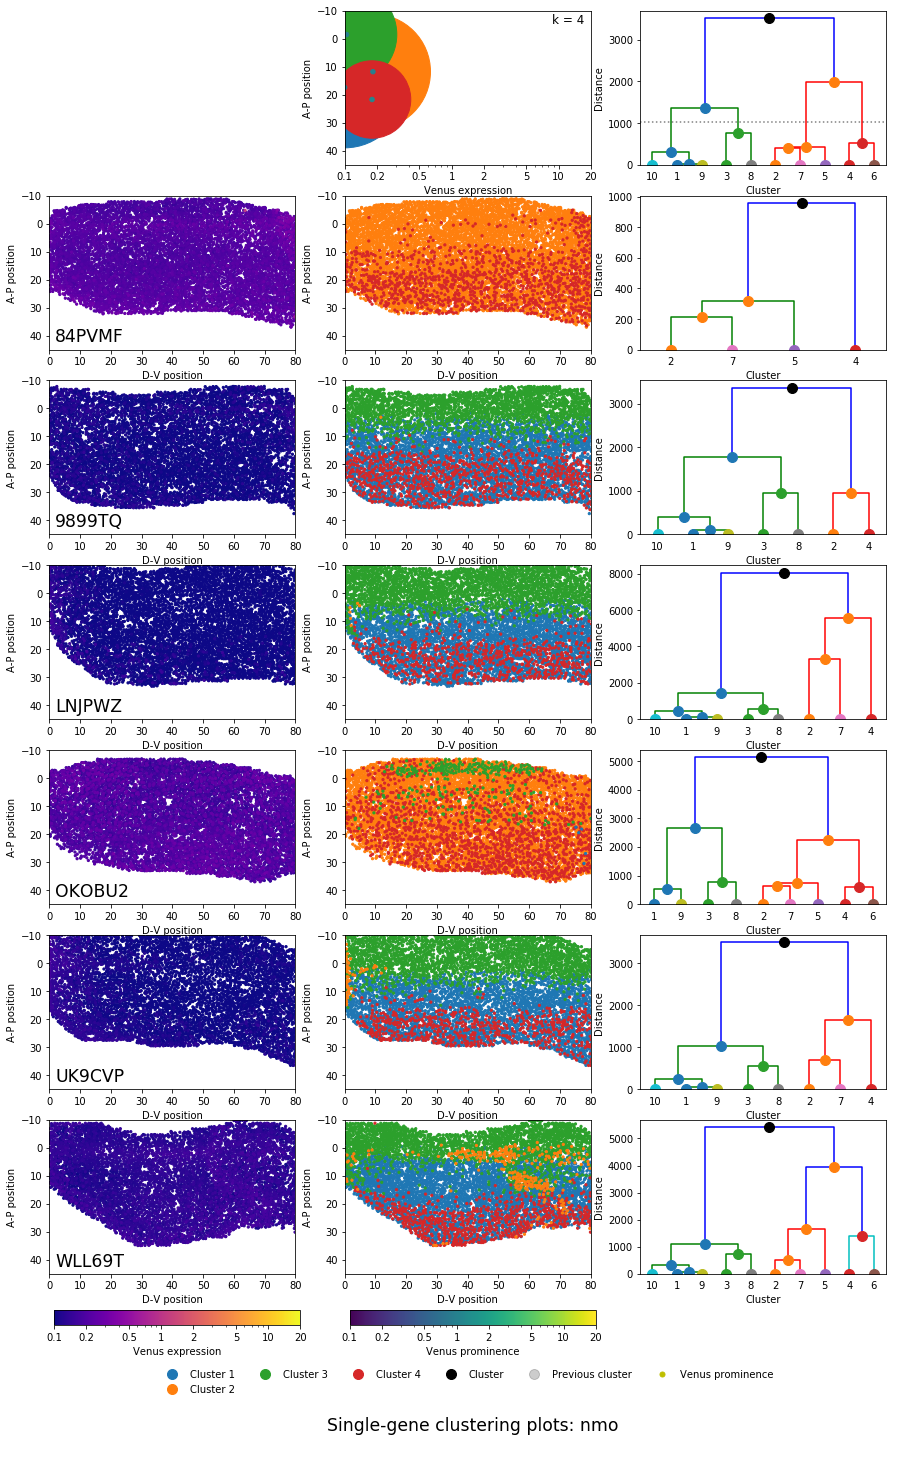

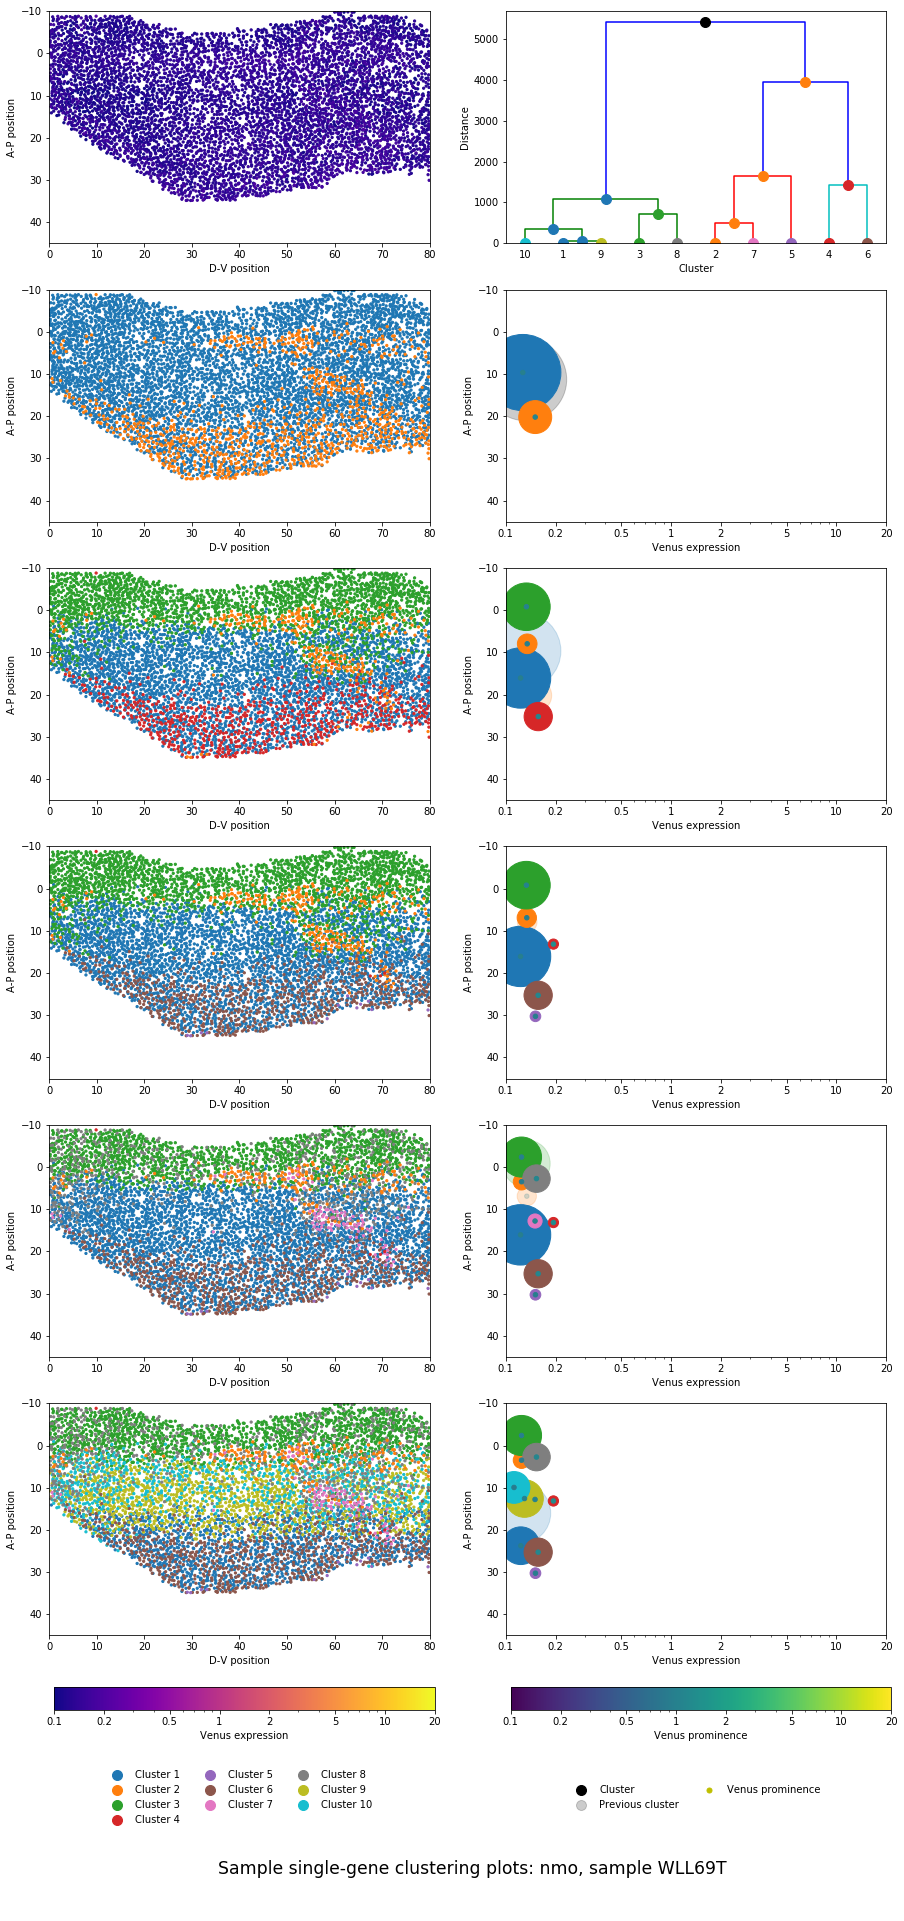

In [16]:
fig = GeneClusteringPlot(hf)
fig.show()
fig = MultiClusteringPlot(hf, 'best')
fig.show()